# 2019.06.29

In [1]:
import matplotlib.pylab as plt
import pandas as pd


df = pd.read_csv("../data/steam-200k.csv",
                usecols=range(3+1),
                names=["userID", "gameName", "behavior", "hours"],
                )
df.tail()

,userID,gameName,behavior,hours
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0
199999,128470551,RUSH,play,1.4


## Feature Delete

구매이력만 있고 플레이하지 않았으면 플레이시간을 0으로 표기  
(behavior = purchase, hours = 0 → hours = 0)

## Sort Data

In [2]:
sorted_df = df.sort_values(['userID', 'gameName'])
sorted_df.head()

,userID,gameName,behavior,hours
65429,5250,Alien Swarm,purchase,1.0
65430,5250,Alien Swarm,play,4.9
65423,5250,Cities Skylines,purchase,1.0
65424,5250,Cities Skylines,play,144.0
65435,5250,Counter-Strike,purchase,1.0


In [3]:
sorted_arr = sorted_df.values.tolist()
sorted_arr[:5]

[[5250, 'Alien Swarm', 'purchase', 1.0],
 [5250, 'Alien Swarm', 'play', 4.9],
 [5250, 'Cities Skylines', 'purchase', 1.0],
 [5250, 'Cities Skylines', 'play', 144.0],
 [5250, 'Counter-Strike', 'purchase', 1.0]]

In [4]:
first_row = sorted_arr[0][:2]

In [5]:
data_list = [first_row]
for i in range(len(sorted_arr)):
    row = sorted_arr[i]
    key, playtime = row[:2], row[-1]
    last_key = data_list[-1][:2]
    
    if key != last_key:
        data_list.append(sorted_arr[i][:2])
        data_list[-1].append(0)
    elif key == last_key:
        data_list[-1][-1] = playtime

In [6]:
merged_df = pd.DataFrame(data_list, columns=['userID', 'gameName', 'hours'])
merged_df.tail()

,userID,gameName,hours
128800,309626088,Age of Empires II HD Edition,6.7
128801,309812026,Counter-Strike Nexon Zombies,0.0
128802,309812026,Robocraft,0.0
128803,309824202,Dota 2,0.7
128804,309903146,Dota 2,0.2


In [7]:
merged_df['dummy'] = 1
merged_df.groupby('userID').sum()

,hours,dummy
userID,,
5250,220.6,22
76767,1227.0,36
86540,255.0,82
103360,0.0,10
144736,0.1,8
181212,2.2,12
229911,390.5,27
298950,3745.4,259
299153,0.0,14


In [8]:
notplay = merged_df.hours == 0
notplay = notplay.astype(int)
merged_df['dummy_notplay'] = notplay

In [9]:
sum_df = merged_df.groupby('userID').sum()
sum_df = sum_df.reset_index()
sum_df.columns = ['userID', 'playtime', 'total_games', 'not_played_games']

In [10]:
sum_df.tail()

,userID,playtime,total_games,not_played_games
12388,309554670,5.9,1,0
12389,309626088,6.7,1,0
12390,309812026,0.0,2,2
12391,309824202,0.7,1,0
12392,309903146,0.2,1,0


In [11]:
sum_df['not_played_ratio'] = sum_df['not_played_games'] / sum_df['total_games']
sum_df['avg_playtime'] = sum_df['playtime'] / sum_df['total_games']
sum_df['avg_actual_playtime'] = sum_df['playtime'] / (sum_df['total_games'] - sum_df['not_played_games'])

In [12]:
sum_df.tail()

,userID,playtime,total_games,not_played_games,not_played_ratio,avg_playtime,avg_actual_playtime
12388,309554670,5.9,1,0,0.0,5.9,5.9
12389,309626088,6.7,1,0,0.0,6.7,6.7
12390,309812026,0.0,2,2,1.0,0.0,NaN
12391,309824202,0.7,1,0,0.0,0.7,0.7
12392,309903146,0.2,1,0,0.0,0.2,0.2


In [13]:
sum_df = sum_df.fillna(0) # NaN 값을 0으로 변환
sum_df.tail()

,userID,playtime,total_games,not_played_games,not_played_ratio,avg_playtime,avg_actual_playtime
12388,309554670,5.9,1,0,0.0,5.9,5.9
12389,309626088,6.7,1,0,0.0,6.7,6.7
12390,309812026,0.0,2,2,1.0,0.0,0.0
12391,309824202,0.7,1,0,0.0,0.7,0.7
12392,309903146,0.2,1,0,0.0,0.2,0.2


In [14]:
var_names = sum_df.columns[1:]  # userID 를 제외한 columns
sum_df[var_names].corr()

,playtime,total_games,not_played_games,not_played_ratio,avg_playtime,avg_actual_playtime
playtime,1.000000,0.465852,0.343850,0.044550,0.435149,0.487902
total_games,0.465852,1.000000,0.942075,0.150111,-0.034738,-0.024351
not_played_games,0.343850,0.942075,1.000000,0.202659,-0.033617,-0.016486
not_played_ratio,0.044550,0.150111,0.202659,1.000000,-0.098094,-0.014598
avg_playtime,0.435149,-0.034738,-0.033617,-0.098094,1.000000,0.935300
avg_actual_playtime,0.487902,-0.024351,-0.016486,-0.014598,0.935300,1.000000


In [15]:
import seaborn as sns

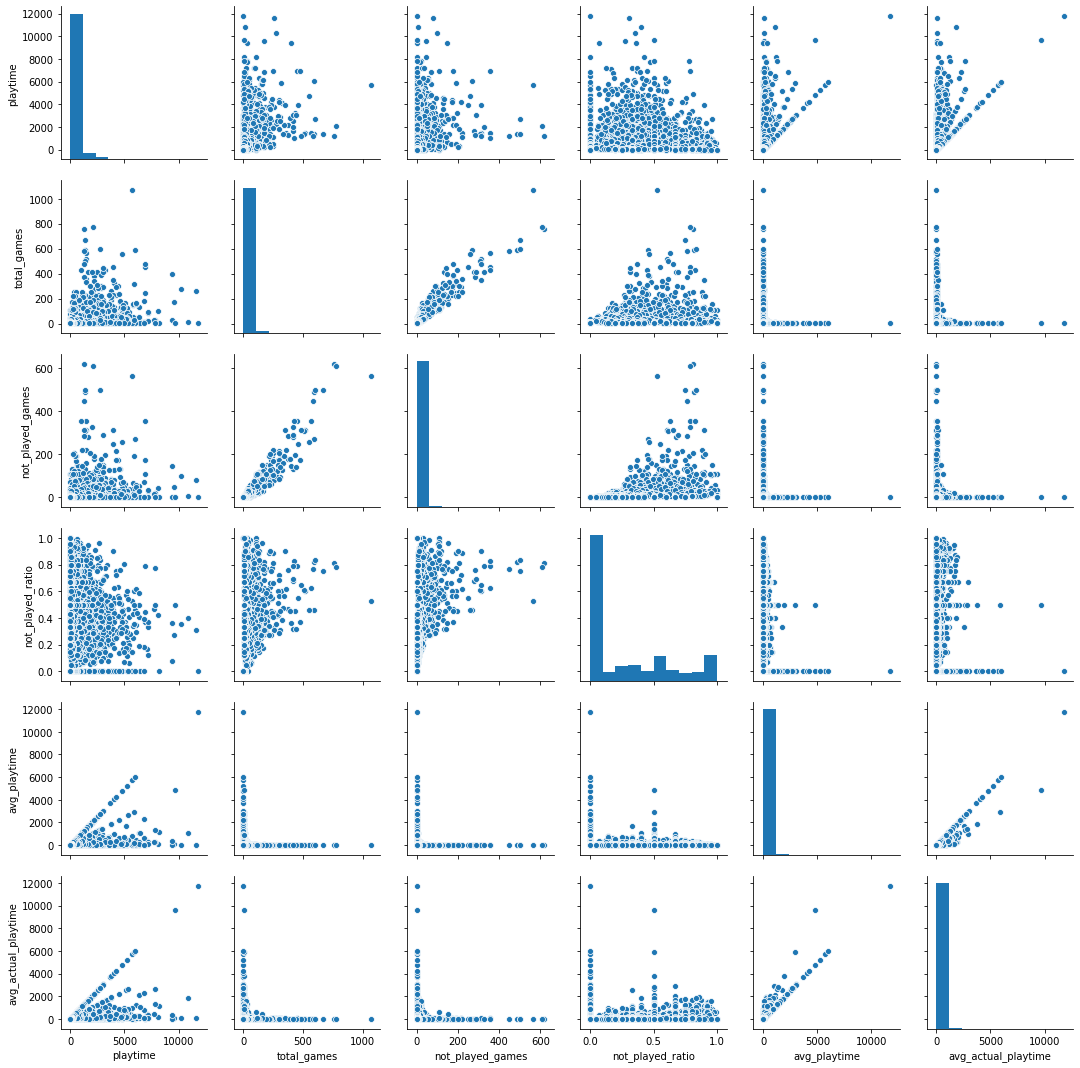

In [16]:
sns.pairplot(sum_df[var_names])

# Regularization with log

- log(0) 은 Inf 가 나오므로 1을 더한값에 log 를 취한다

In [17]:
import numpy as np

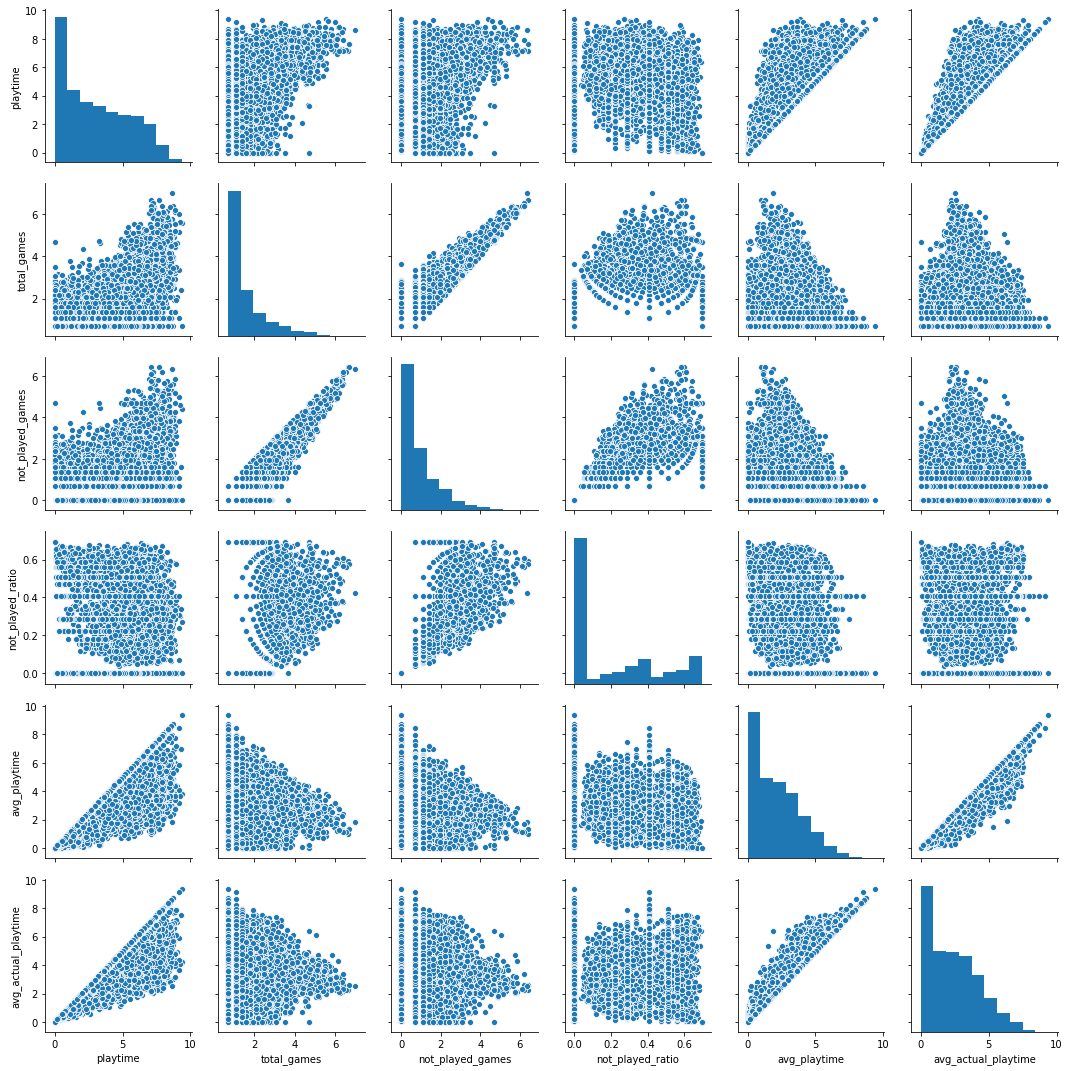

In [18]:
log_df = np.log1p(sum_df) # np.log(sum_df) 와 동일
sns.pairplot(log_df[var_names])